# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [74]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [75]:
iris = load_iris()

x = iris.data
y = iris.target

In [76]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [79]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [80]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [81]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [82]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [83]:
tr_x_l.head(2)

,sepal length (cm),petal length (cm)
81,5.5,3.7
97,6.2,4.3


In [84]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [85]:
from tensorflow.keras.utils import to_categorical

In [86]:
y_len = len(set(train_y))

In [87]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [88]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [89]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [90]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input(shape=(2,))
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input(shape=(2,))
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer=Adam())
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

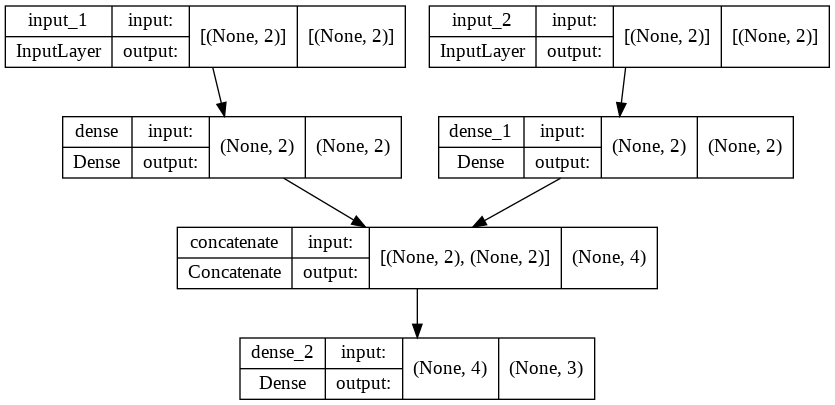

In [91]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [92]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, restore_best_weights=True)

In [93]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
epochs=1000, verbose=1, callbacks=[es]) # [] 안에는 모델링 순서와 똑같이 넣어야함

Epoch 1/1000
4/4 [==============================] - 1s 77ms/step - loss: 1.1746 - accuracy: 0.3333 - val_loss: 1.1904 - val_accuracy: 0.3333
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1700 - accuracy: 0.3333 - val_loss: 1.1855 - val_accuracy: 0.3333
Epoch 3/1000
4/4 [==============================] - 0s 18ms/step - loss: 1.1658 - accuracy: 0.3333 - val_loss: 1.1809 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 18ms/step - loss: 1.1625 - accuracy: 0.3333 - val_loss: 1.1763 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.1584 - accuracy: 0.3333 - val_loss: 1.1721 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1553 - accuracy: 0.3333 - val_loss: 1.1679 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1520 - accuracy: 0.3333 - val_loss: 1.1641 - val_accuracy: 0.3333
Epoch 8/1000


---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [94]:
iris = load_iris()

x = iris.data
y = iris.target

In [95]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [96]:
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [97]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [98]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2022)
# df_x가 들어가는 이유는 columns 이름을 그대로 가져오기 위함

In [99]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [100]:
train_xl = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)']]
train_xw = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]
test_xl = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)']]
test_xw = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]

In [101]:
train_xl.shape, train_xw.shape, test_xl.shape, test_xw.shape

((120, 2), (120, 2), (30, 2), (30, 2))

## One-hot Encoding

In [102]:
from tensorflow.keras.utils import to_categorical
y_len = len(set(train_y))

In [103]:
train_y = to_categorical(train_y, y_len)
test_y = to_categorical(test_y, y_len)

In [104]:
train_y.shape, test_y.shape

((120, 3), (30, 3))

## Modeling : multi-input & Concatenate layer

In [105]:
clear_session()

a = Input(shape=(2,), name='input_length')
h1 = Dense(2, activation=relu, name='hidden_length')(a)

b = Input(shape=(2,), name='input_width')
h2 = Dense(2, activation=relu, name='hidden_width')(b)

cl = Concatenate(name='concat_layer')([h1, h2])
ol = Dense(3, activation=softmax)(cl)

model = Model([a, b], ol)

model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer=Adam())
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_length (InputLayer)      [(None, 2)]          0           []                               
                                                                                                  
 input_width (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 hidden_length (Dense)          (None, 2)            6           ['input_length[0][0]']           
                                                                                                  
 hidden_width (Dense)           (None, 2)            6           ['input_width[0][0]']            
                                                                                              

## 모델 시각화

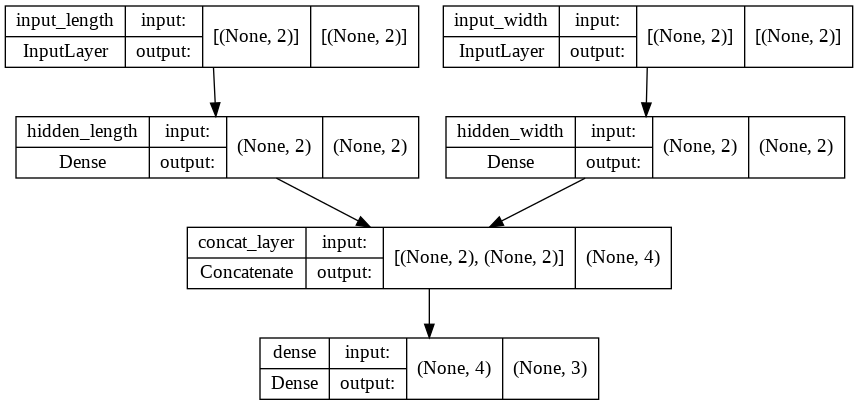

In [106]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [107]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [108]:
history = model.fit([train_xl, train_xw], train_y, validation_split=0.15, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 65ms/step - loss: 3.1176 - accuracy: 0.6471 - val_loss: 2.8260 - val_accuracy: 0.6111
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.0169 - accuracy: 0.6471 - val_loss: 2.7257 - val_accuracy: 0.6667
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.9186 - accuracy: 0.6471 - val_loss: 2.6330 - val_accuracy: 0.6667
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.8247 - accuracy: 0.6471 - val_loss: 2.5474 - val_accuracy: 0.6667
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.7399 - accuracy: 0.6471 - val_loss: 2.4668 - val_accuracy: 0.6667
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.6621 - accuracy: 0.6471 - val_loss: 2.3912 - val_accuracy: 0.6667
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.5833 - accuracy: 0.6471 - val_loss: 2.3240 - val_accuracy: 0.6667
Epoch 8/1000
